In [14]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import matplotlib.patches as patches
from IPython.display import HTML


%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Trajectory Functions

In [15]:
def point_to_point_traj(x1,v1,ac1,x2,v2,ac2,T):
    for i in range(len(T)-1):
        t_o = T[i]
        t_f = T[i+1]
        t = np.linspace(t_o,t_f,10*(t_f-t_o))
        print(len(t))
        M = np.array([[1,t_o,t_o**2,t_o**3,t_o**4,t_o**5],[0,1,2*t_o,3*t_o**2,4*t_o**2,5*t_o**4],[0,0,2,6*t_o,12*t_o**2,20*t_o**3],[1,t_f,t_f**2,t_f**3,t_f**4,t_f**5],[0,1,2*t_f,3*t_f**2,4*t_f**2,5*t_f**4],[0,0,2,6*t_f,12*t_f**2,20*t_f**3]])
        B = np.array([x1,v1,ac1,x2,v2,ac2])
        det_matrix = np.linalg.det(M)
        print("The Determinant is: ",det_matrix)
        co_matrix = np.dot(np.linalg.inv(M),B)
        position = co_matrix[0] + co_matrix[1]*t + co_matrix[2]*t**2 + co_matrix[3]*t**3 + co_matrix[4]*t**4 + co_matrix[5]*t**5
        velocity = co_matrix[1] + 2*co_matrix[2]*t + 3*co_matrix[3]*t**2 + 4*co_matrix[4]*t**3 + 5*co_matrix[5]*t**4
        accelaration = 2*co_matrix[2] + 6*co_matrix[3]*t + 12*co_matrix[4]*t**2 + 20*co_matrix[5]*t**3

    return position, velocity, accelaration

def piecewise2D(X, Y, Vx, Vy, Ax, Ay, T):
    theta_x, theta_y, dx, dy, ddx, ddy = [],[],[],[],[],[]
    for i in range(len(P)-1):
        theta_xi, dxi, ddxi = point_to_point_traj(X[i],Vx[i],Ax[i],X[i+1],Vx[i+1],Ax[i+1],T)
        theta_yi, dyi, ddyi = point_to_point_traj(Y[i],Vy[i],Ay[i],Y[i+1],Vy[i+1],Ay[i+1],T)

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist() 
        dy += dyi.tolist()
        ddx += ddxi.tolist()
        ddy += ddyi.tolist()
        plt.plot(theta_x,theta_y)
    return theta_x,theta_y,dx,dy,ddx,ddy


# Plotting Functions

In [16]:
def plot_points():
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    plt.xlabel('X_Position')
    plt.ylabel('Y_Position')
    plt.title('Quintic Trajectory')
    plt.grid()
    ax1.plot(X,Y, '--')
    ax1.plot(X,Y, 'o')
    ax1.quiver(X,Y, Vx, Vy, color='r')

In [17]:
def plot_speed():
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plt.title('Veloctiy of Robot')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.grid()
    plt.plot(speed)

# Requirements for the trajectory

30
The Determinant is:  -1390932.000000002
30
The Determinant is:  -1390932.000000002


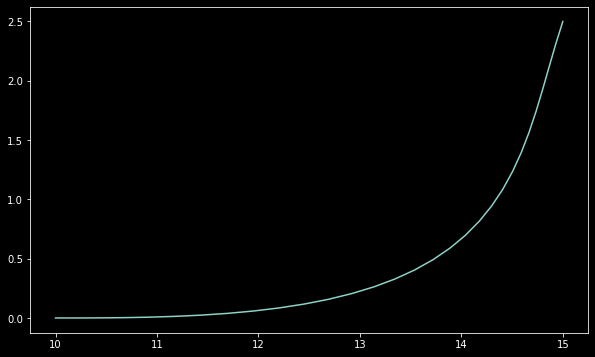

In [18]:
# Waypoints
p1 = [10, 0]
p2 = [15,2.5]

# Velocities
v1 = [2,0.]
v2 = [1,0]

# Time
t1 = 0
t2 = t1 + 3

#Accelaration
A1 = [1.5, 0]
A2 = [1,0]

# Grouping
P = np.vstack((p1, p2))
V = np.vstack((v1, v2))
A = np.vstack((A1, A2))
T = [t1, t2]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]
Ax, Ay = A[:,0], A[:,1]

# Piecewise function
theta_x, theta_y, dx, dy, ddx, ddy= piecewise2D(X, Y, Vx, Vy, Ax, Ay, T)

# Plotting Points and Speed

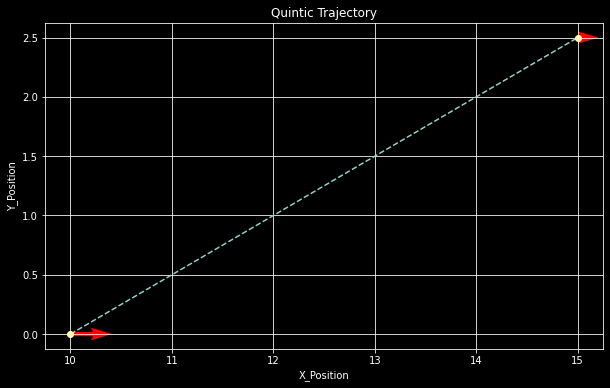

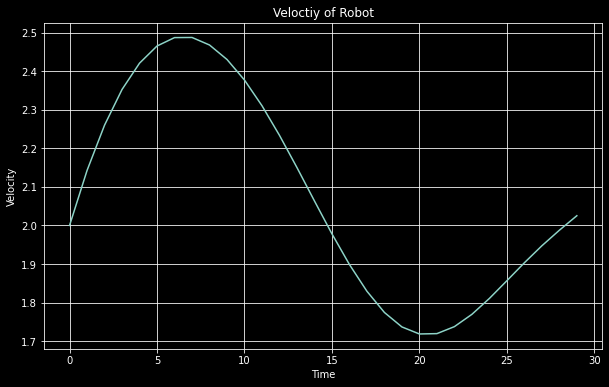

In [19]:
plot_points()
plot_speed()

## Animation

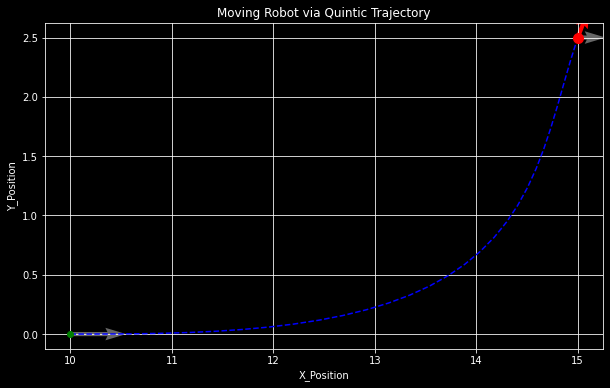

In [22]:
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    plt.title('Moving Robot via Quintic Trajectory')
    plt.xlabel('X_Position')
    plt.ylabel('Y_Position')
    plt.grid()
    # Path
    ax.plot(theta_x, theta_y, 'b--')
    
    # Initial conditions
    ax.plot(X,Y, 'go')
    ax.quiver(X,Y, Vx, Vy, color='0.4', scale=20)
        
    # Dynamic position
    ax.plot(theta_x[t], theta_y[t], 'ro', markersize=10)
       
    # Velocity vector
    ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=100/np.linalg.norm([theta_x[t], theta_y[t]]))
    

anim = animation.FuncAnimation(fig, animate, frames=int(len(theta_x)/1), interval=100)
HTML(anim.to_jshtml())